    name Jameson Jolley<
    analyze the predictive power and the running time of different classifiers

___

binary classification:


runtime: 
    If I is the number of iterations, n is the number of data points, and m is the Number of features.
    $$O(i*n*m)$$

behavior:
    I would not say this is fast, but you can redo this, vectorize the operations, and make it faster.
    This method is not complicated, but it is not the best, as in my tests, some of the predictions are not possible to reduce to a 0 or even past 3 or 4. The advantage here is simplicity; if the classes are far enough apart from each other, then this is a good approximation, and we do not need to use more precise methods.

___

Adaline

runtime: 
    i is the number of iterations, n is the number of data points, and m is the Number of features
    $$O(i*n*m)$$

behavior:
    For this method, it is sensitive to the learning rate. If it is not small, the cost can explode to infinity.This is also time and data set-sensitive because we do matrix multiplication on the entire transposed data set it can be implemented with current hardware. The benefit is that it can converge very fast. ironically this was the fastest on the small data set by a long shot, becaus of the vectorized operations but that can be changed with the binary classifiers

___



SGD

runtime: 
    I is the number of iterations, n is the number of data points, and m is the Number of features
    $$O(i*n*m)$$

behavior:
    This is like Adaline, but row by row. This means that you must shuffle the data because if you do not, the model can forget data in the beginning of the data set, and override it with the new data. Like Adaline, if the learning rate is high, it can explode. But because of the row-by-row nature, it is more hardware-friendly, and if we encounter an error, we can save our progress 

___

example:
i made all the methods above in the python files
i used oo panders and some unit tests to make sure things work
i gathered some data to make graphs on how things converge 
this is a graph that shows how the different methods converge
all of the models have the same 
learning_rate=0.00001, n_iterations=10000

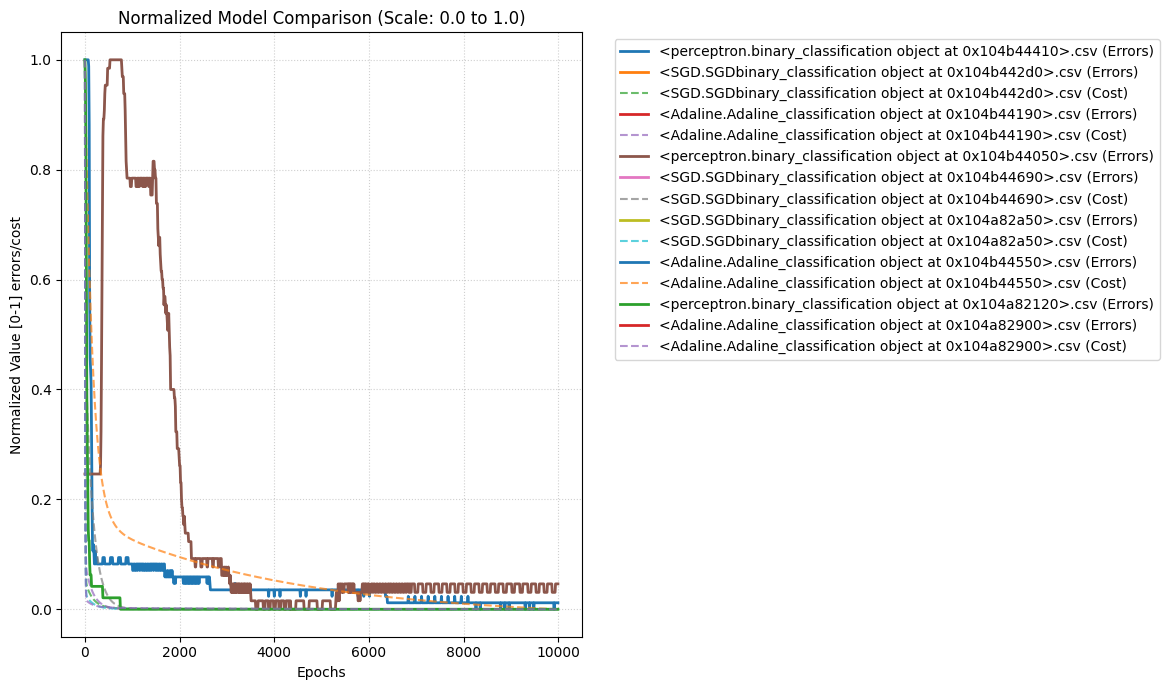

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_all_normed(directory_path):
    plt.figure(figsize=(12, 7))
    files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
    for file in files:
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path)
        df.replace(-1, np.nan, inplace=True)
        def normalize(series):
            if series.isna().all(): return series
            s_min, s_max = series.min(), series.max()
            if s_max == s_min: return series - s_min 
            return (series - s_min) / (s_max - s_min)
        norm_errors = normalize(df['errors'])
        norm_cost = normalize(df['cost'])
        plt.plot(df['epoch'], norm_errors, label=f"{file} (Errors)", linewidth=2)
        if not norm_cost.isna().all():
            plt.plot(df['epoch'], norm_cost, label=f"{file} (Cost)", linestyle='--', alpha=0.7)
    plt.title("Normalized Model Comparison (Scale: 0.0 to 1.0)")
    plt.xlabel("Epochs")
    plt.ylabel("Normalized Value [0-1] errors/cost")
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("normalized_comparison.png")
    plt.show()

plot_all_normed("data")

It is hard to draw conclusions ,but one conclusion is that the SGD is the best method, as it seems like the binary classification is just not as good at converging to a value as the other methods, and seems to be jagged and jumpy. 

While the Adaline method was fast but not as fast as SGD. 

___

the second data set:
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

This one was good as it was numeric and was a binary classification problem.
We used this to make one of each bolt a negative and a normal class under the name. The issues with this data set are that we had to scale the features, or we could not train the data, or the cost would explode, and we could not do anything with the data. This data also had 35 features, so it was a high cost at the start



<pre>
--- Training Algorithm: Adaline ---
Training Dropout_Adaline for Dropout...
Dropout_Adaline.json Iteration 0: Cost 221.25793181888298
Dropout_Adaline.json Iteration 1000: Cost 221.25793163131934
Dropout_Adaline.json Iteration 2000: Cost 221.25793160165222
Dropout_Adaline.json Iteration 3000: Cost 221.2579315969602
Dropout_Adaline.json Iteration 4000: Cost 221.2579315962183
Dropout_Adaline.json Iteration 5000: Cost 221.25793159610043
Dropout_Adaline.json Iteration 6000: Cost 221.25793159608173
Dropout_Adaline.json Iteration 7000: Cost 221.25793159607875
Dropout_Adaline.json Iteration 8000: Cost 221.25793159607875
Dropout_Adaline.json Iteration 9000: Cost 221.25793159607898
Done. Final cost: 221.257932
Training Graduate_Adaline for Graduate...
Graduate_Adaline.json Iteration 0: Cost 265.441522867526
Graduate_Adaline.json Iteration 1000: Cost 265.4415222352751
Graduate_Adaline.json Iteration 2000: Cost 265.4415221352747
Graduate_Adaline.json Iteration 3000: Cost 265.44152211945584
Graduate_Adaline.json Iteration 4000: Cost 265.4415221169542
Graduate_Adaline.json Iteration 5000: Cost 265.4415221165587
Graduate_Adaline.json Iteration 6000: Cost 265.44152211649595
Graduate_Adaline.json Iteration 7000: Cost 265.4415221164859
Graduate_Adaline.json Iteration 8000: Cost 265.4415221164849
Graduate_Adaline.json Iteration 9000: Cost 265.4415221164844
Done. Final cost: 265.441522

--- Training Algorithm: SGD ---
Training Dropout_SGD for Dropout...
Dropout_SGD.json Iteration 0: Cost 0.05313940458138762
Dropout_SGD.json Iteration 10: Cost 0.05300357122377192
Dropout_SGD.json Iteration 20: Cost 0.05287575950891845
Dropout_SGD.json Iteration 30: Cost 0.052756224329823395
Dropout_SGD.json Iteration 40: Cost 0.052643565037742444
Dropout_SGD.json Iteration 50: Cost 0.05253796901714236
Dropout_SGD.json Iteration 60: Cost 0.05243838763806387
Dropout_SGD.json Iteration 70: Cost 0.05234460796331384
Dropout_SGD.json Iteration 80: Cost 0.05225623329004955
Dropout_SGD.json Iteration 90: Cost 0.05217264966282127
Training Graduate_SGD for Graduate...
Graduate_SGD.json Iteration 0: Cost 0.06100242405035579
Graduate_SGD.json Iteration 10: Cost 0.06097019351281705
Graduate_SGD.json Iteration 20: Cost 0.06093896694410142
Graduate_SGD.json Iteration 30: Cost 0.060910679943212025
Graduate_SGD.json Iteration 40: Cost 0.06088284249955149
Graduate_SGD.json Iteration 50: Cost 0.06085741621042325
Graduate_SGD.json Iteration 60: Cost 0.06083261142159224
Graduate_SGD.json Iteration 70: Cost 0.06080910893316731
Graduate_SGD.json Iteration 80: Cost 0.0607865780793983
Graduate_SGD.json Iteration 90: Cost 0.06076536803336958
</pre>


If we look at this, we can see that Adeline can get stuck in a local minimum. In contrast to SGD, where there is a grater likely hood of breaking out of a local minimum. The models are not good at predicting a lot of the time. It is very bad at prediction the -test flag shows how well the model fits the training data, and some of them are good and others are very bad. Not sure if this is an error in the training logic or just the nature of trying to train a single perceptron on a small data set 

<pre>

The only exception is this

— Test Results for Dropout —
Targeting: Dropout
Accuracy: 83.52%
Predicted ‘Positive’ for 1414 out of 4424 samples (32.0%)
True Positives: 1053 | False Positives: 361
True Negatives: 2642 | False Negatives: 368
vector was standardized
the prediction from Dropout is 1

— Test Results for Graduate —
Targeting: Graduate
Accuracy: 82.78%
Predicted ‘Positive’ for 2427 out of 4424 samples (54.9%)
True Positives: 1937 | False Positives: 490
True Negatives: 1725 | False Negatives: 272
vector was standardized
the prediction from Graduate is 0



I could not tell you why this is the case for the binay classafacation. where the others were not accurate
my conclution is that low cost does not equal good accuracy. but also The Iris dataset classes (Versicolor/Virginica) are not perfectly separable by a single line. A single-layer network will never reach 100% accuracy this could be the issue 
</pre>



___

## testing yourself

I left a test.sh file that inputs some data to test. It's a good example
unfortunate i could not find test data, so I don't know how accurate the model is 
outside the 2 data sets i used there is also a help message to show correct usage 
